In [1]:
# RE-DO or webscrapping

In [1]:
from selenium import webdriver
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import re
import requests 
import pandas as pd
import csv

In [2]:
from selenium.webdriver.chrome.options import Options

In [3]:
driver = webdriver.Chrome(executable_path='chromedriver_mac64/chromedriver')

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_58932/3637230804.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='chromedriver_mac64/chromedriver')


In [4]:
driver.get('https://www.scmp.com/news/asia/east-asia/article/3219664/warren-buffett-prefers-berkshire-hathaway-invest-japan-taiwan-due-us-china-rivalry-faults-us-bank')

'<html lang="en" class="hydrated"><head><script src="https://buy.tinypass.com/api/v3/anon/assets/gaAccount?aid=4YRl5Ft4pu&amp;tbc=%7Bkpex%7DV6CRv2FtOcRqgCr8jQ-6R9zKm_J0IJuB4cX6sU18689yHLtq0r-3YwOar-W4moMH&amp;user_provider=piano_id_lite&amp;user_token=&amp;callApiJsonp=true&amp;callback=jsonp8067"></script><script type="text/javascript" async="" src="https://cdn.cxense.com/cx.js"></script><script async="" type="text/javascript" src="https://cdn.cxense.com/cx.cce.js"></script><script async="" src="//cdn.keywee.co/dist/sp-2.9.1.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-VD9LCVW2ZV&amp;l=dataLayer&amp;cx=c"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/gtm/optimize-dyn.js?id=GTM-WGPXHW8&amp;cid=1514288444.1684238670&amp;cb=0.48452447174098134"></script><script src="//cdn.keywee.co/dist/analytics.min.js" async=""></script><script async="" src="https://sb.scorecardresearch.com/cs/6687883/be
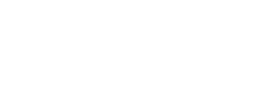

In [5]:
driver.page_source

In [8]:
soup = BeautifulSoup(driver.page_source)

In [9]:
eval(soup.find_all('script', {'type':'application/ld+json'})[3].text)['articleBody']

'Investment tycoon Warren Buffett on Saturday said he is more comfortable with Berkshire Hathaway Inc deploying capital in Japan than Taiwan, reflecting the growing tensions between the United States and mainland China. The billionaire investor contrasted Berkshire’s recently increased investments in five Japanese trading houses with its recent U-turn on a multibillion-dollar investment in Taiwan Semiconductor Manufacturing Co, or TSMC. “It’s a marvellous company,” Buffett said at Berkshire’s annual meeting, referring to Taiwan Semiconductor. But “I would feel better about capital that we’ve got deployed in Japan than in Taiwan … That’s the reality.” Berkshire invested more than US$4 billion in TSMC last year, only to sell most of it within three months. Tensions between the US and China have simmered in recent months, with some investors worried that mainland China might invade Taiwan. Meanwhile, Berkshire revealed last month it had increased its stakes in Itochu Corp, Marubeni Corp, 

In [10]:
driver = webdriver.Chrome()
driver.get('https://www.scmp.com/topics/us-china-relations')

SCROLL_PAUSE_TIME = 0.5

    # Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
            # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

            # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

            # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [22]:
footer = driver.find_element(by='id', value='footer-container')

In [23]:
driver.execute_script("window.scroll(0,document.body.scrollHeight);")

In [24]:
driver.execute_script("arguments[0].scrollIntoView(true);", footer)

In [14]:
SCROLL_PAUSE_TIME = 0.5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

In [15]:
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [48]:
class USChinaSpider:
    def __init__(self):
        self.name = "us_china_spider"
        self.start_urls = ['https://www.scmp.com/topics/us-china-relations']
        self.base_url = 'https://www.scmp.com'

        chrome_options = Options()
        #chrome_options.add_argument("--headless")
        self.driver = webdriver.Chrome(options=chrome_options)
        
    
    def run(self):
        self.driver.get(self.start_urls[0])
        i = 1
        time.sleep(2)
        footer = self.driver.find_element(by='id', value='footer-container')
        print (footer)
        while i < 100: # this will load articles for the past 6 months
            time.sleep(2) # load page
            #screen_height = self.driver.execute_script("return window.screen.height;")
            self.driver.execute_script("arguments[0].scrollIntoView(true);", footer)
            #self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            #self.driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))
            i += 1
        soup = BeautifulSoup(self.driver.page_source, 'html.parser')

        content = soup.find_all('div', {'class':'e1m4d8qc6'})
        #print (content)

        with open('scmp_spider.csv', mode='w', encoding='utf-8', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['title', 'summary', 'url', 'source'])
            counter = 0
            
            for article in content:
                if counter == 0:
                    url = article.find('a').get('href')
                    print (url)

                    title = article.find('h2').text
                    print(title)

                    summary = article.find('div', attrs={'class': 'e13t0rm74'}).text
                    print(summary)
                    
                else:  
                    url = article.find('a').get('href')
                    print (url)

                    title = article.find('h2').text
                    print(title)

                    summary = article.find('div', attrs={'class': 'e13t0rm74'}).text
                    print(summary)

                    
                self.driver.get(self.base_url+url)
                soup_article = BeautifulSoup(self.driver.page_source, 'html.parser')
                print(self.base_url+url)
                text = eval(soup_article.find_all('script', {'type':'application/ld+json'})[3].text)['articleBody']
                
                writer.writerow([title, summary, url, self.name, text])
                counter += 1
                

In [69]:
class USChinaSpider:
    def __init__(self):
        self.name = "us_china_spider"
        self.start_urls = ['https://www.scmp.com/topics/us-china-relations']
        self.base_url = 'https://www.scmp.com'

        chrome_options = Options()
        #chrome_options.add_argument("--headless")
        self.driver = webdriver.Chrome(options=chrome_options)
        
    def run(self):
        self.driver.get(self.start_urls[0])
        i = 1
        time.sleep(2)
        footer = self.driver.find_element(by='id', value='footer-container')
        #print (footer)
        while i < 100: # this will load articles for the past 12 months
            time.sleep(0.5) # load page
            self.driver.execute_script("arguments[0].scrollIntoView(true);", footer)
            i += 1
        soup = BeautifulSoup(self.driver.page_source, 'html.parser')

        content = soup.find_all('div', {'class':'e1kbao0v7'})
        #if content: # check if the line is found in the content
        with open('scmp_spider.csv', mode='w', encoding='utf-8', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['title', 'summary', 'url', 'source'])
            counter = 0

            for article in content:
                if counter == 0:
                    url = article.find('a').get('href')
                    print (url)

                    title = article.find('h2').text
                    print(title)

                    summary = article.find('div', attrs={'class': 'e1evd6rc0'}).text
                    print(summary)

                else:  
                    url = article.find('a').get('href')
                    print (url)

                    title = article.find('h2').text
                    print(title)

                    summary = article.find('div', attrs={'class': 'e13t0rm74'}).text
                    print(summary)


                try:
                    self.driver.get(self.base_url+url)
                    soup_article = BeautifulSoup(self.driver.page_source, 'html.parser')
                    print(self.base_url+url)
                    text = eval(soup_article.find_all('script', {'type':'application/ld+json'})[3].text)['articleBody']
                except:
                    text = ''
                    
                writer.writerow([title, summary, url, self.name, text])
                counter += 1

In [70]:
def __del__(self):
        self.driver.quit()

In [71]:
if __name__ == "__main__":
    spider = USChinaSpider()
    spider.run()

/news/china/diplomacy/article/3213710/summit-major-diplomatic-event-boost-chinas-ties-central-asian-nations-amid-ukraine-afghanistan
Summit a ‘major diplomatic event’ to boost China’s ties with Central Asia
Leaders of Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan and Uzbekistan invited to first China-Central Asia summit
Presence of ethnic Russians in the five countries has triggered fears Moscow could target their territory next, analyst says

https://www.scmp.com/news/china/diplomacy/article/3213710/summit-major-diplomatic-event-boost-chinas-ties-central-asian-nations-amid-ukraine-afghanistan
/news/china/diplomacy/article/3220662/us-arrests-chinese-american-charges-acting-unregistered-foreign-agent-beijing
US arrests man on charges of acting as unregistered foreign agent for Beijing
Litang Liang, 63, of Massachusetts is accused of reporting to consulate officials on protests in the Boston area against China government actions since 2018.

https://www.scmp.com/news/china/diplomacy/a

1. Did not use time stamp, so i can't do trending by time
2. will use politico and bbc as sources to complement insights
- both uses click, not endless scrolling
- needs another way to run selenium

3. when it comes to the video page, i could not skip it